# Project topic: Restaurant Popularity Analysis Using Yelp Reviews<br/>
## Explortory Data Analysis<br/>

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import nltk
#nltk.download()
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt   
from wordcloud import WordCloud
import datetime
from nltk.corpus import stopwords
import string

# plot charts inline
%matplotlib inline

In [2]:
df = pd.read_csv('raw_data_0504.csv')
df.head()
df.info() # get detailed information of each column 

,Restaurant_Name,review,Score,review_date,"time, food, pretty","wait, good, experience","ordered, table, great","place, service, like",Sentiment
0,Ippudo NY,"This place is awesome.. i love the soup broth,...",5,4/23/2019,0,1,1,2,1
1,Ippudo NY,"Ramen noodles are good, the pork bunds are so ...",4,5/3/2019,1,2,0,0,0
2,Ippudo NY,Go early before the line starts backing up. T...,3,4/24/2019,0,0,0,0,0
3,Ippudo NY,I came at around 7:20pm on a Sunday evening an...,5,4/22/2019,0,3,3,2,1
4,Ippudo NY,This is my favorite ramen spot in the city. Th...,5,4/16/2019,0,3,1,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19720 entries, 0 to 19719
Data columns (total 9 columns):
Restaurant_Name           19720 non-null object
review                    19720 non-null object
Score                     19720 non-null int64
review_date               19720 non-null object
time, food, pretty        19720 non-null int64
wait, good, experience    19720 non-null int64
ordered, table, great     19720 non-null int64
place, service, like      19720 non-null int64
Sentiment                 19720 non-null int64
dtypes: int64(6), object(3)
memory usage: 1.4+ MB


In [3]:
print( "There are {} observations in this dataset. \n".format(df.shape[0]))

There are 19720 observations in this dataset. 



## Compute summary statistics for all restaurants

In [4]:
restaurant = df.groupby("Restaurant_Name")
restaurant.describe()

Score                        \
                                              count   mean       std  min   
Restaurant_Name                                                             
Artichoke Basille's Pizza                     680.0  4.300  1.005727  1.0   
Beauty & Essex                                680.0  3.900  1.579135  1.0   
Buddakan                                      680.0  4.350  0.654316  3.0   
Cafe Habana                                   680.0  4.200  1.030321  2.0   
Cafeteria                                     680.0  3.550  1.396556  1.0   
Carmine's Italian Restaurant - Times Square   680.0  4.450  0.805266  2.0   
Eataly NYC Flatiron                           680.0  4.000  1.225646  1.0   
Ess-a-Bagel                                   680.0  4.300  0.843235  3.0   
Grimaldi's Pizzeria                           680.0  3.600  1.020555  1.0   
Ippudo NY                                     680.0  4.200  1.030321  2.0   
Ippudo Westside                               680.0  4.450  0.669447  3.0   
Jacob's Pickles                               680.0  4.100  0.944093  2.0   
Jane                                          680.0  3.350  0.853564  2.0   
Joe's Shanghai                                680.0  3.750  1.090527  1.0   
Junior's Restaurant & Bakery - 45th St.       680.0  4.200  0.748882  3.0   
Lombardi's Pizza                              680.0  3.800  1.167049  1.0   
Max Brenner - New York                        680.0  3.550  1.204007  1.0   
Momofuku Noodle Bar                           680.0  3.750  0.942766  2.0   
Morimoto                                      680.0  4.000  1.000736  2.0   
Peter Luger                                   680.0  4.600  0.583524  3.0   
Red Rooster Harlem                            680.0  3.500  1.118857  1.0   
Reserve a Table                              2720.0  3.925  1.081575  1.0   
Shake Shack                                  1360.0  4.050  0.973754  1.0   
The Halal Guys                                680.0  4.500  0.671314  3.0   
Totto Ramen                                   680.0  3.850  1.062620  2.0   

                                                                  Sentiment  \
                                              25%  50%   75%  max     count   
Restaurant_Name                                                               
Artichoke Basille's Pizza                    4.00  5.0  5.00  5.0     680.0   
Beauty & Essex                               3.00  5.0  5.00  5.0     680.0   
Buddakan                                     4.00  4.0  5.00  5.0     680.0   
Cafe Habana                                  3.75  5.0  5.00  5.0     680.0   
Cafeteria                                    2.75  4.0  5.00  5.0     680.0   
Carmine's Italian Restaurant - Times Square  4.00  5.0  5.00  5.0     680.0   
Eataly NYC Flatiron                          3.00  4.5  5.00  5.0     680.0   
Ess-a-Bagel                                  3.75  5.0  5.00  5.0     680.0   
Grimaldi's Pizzeria                          3.00  4.0  4.00  5.0     680.0   
Ippudo NY                                    3.75  5.0  5.00  5.0     680.0   
Ippudo Westside                              4.00  5.0  5.00  5.0     680.0   
Jacob's Pickles                              3.00  4.0  5.00  5.0     680.0   
Jane                                         3.00  3.0  4.00  5.0     680.0   
Joe's Shanghai                               3.00  4.0  5.00  5.0     680.0   
Junior's Restaurant & Bakery - 45th St.      4.00  4.0  5.00  5.0     680.0   
Lombardi's Pizza                             3.00  4.0  5.00  5.0     680.0   
Max Brenner - New York                       3.00  4.0  4.00  5.0     680.0   
Momofuku Noodle Bar                          3.00  4.0  4.25  5.0     680.0   
Morimoto                                     3.00  4.0  5.00  5.0     680.0   
Peter Luger                                  4.00  5.0  5.00  5.0     680.0   
Red Rooster Harlem                           3.00  4.0  4.00  5.0     68

## Top 5 rated restaurants

In [5]:
restaurant.mean().sort_values(by="Score", ascending=False).head()

,Score,"time, food, pretty","wait, good, experience","ordered, table, great","place, service, like",Sentiment
Restaurant_Name,,,,,,
Peter Luger,4.60,1.075000,1.605882,1.052941,1.422059,0.65
The Halal Guys,4.50,1.776471,0.916176,0.316176,0.863235,0.60
Carmine's Italian Restaurant - Times Square,4.45,1.654412,1.335294,1.083824,1.126471,0.60
Ippudo Westside,4.45,1.126471,1.889706,0.970588,1.554412,0.55
Buddakan,4.35,1.554412,1.491176,1.400000,1.497059,0.45


Analysis: We tried to get the top 5 restaurants with higest average rating.

##  Deal with Missing Values
- Find variables with missing values
- How to deal variables with missing values
  - drop samples (rows)
  - drop variables (columns)
  - interpolate

In [6]:
df.isnull().sum(axis=0)

Restaurant_Name           0
review                    0
Score                     0
review_date               0
time, food, pretty        0
wait, good, experience    0
ordered, table, great     0
place, service, like      0
Sentiment                 0
dtype: int64

- Note： We don't have any missing values in the dataset.

# Visualization


## Analysis of rating distribution 

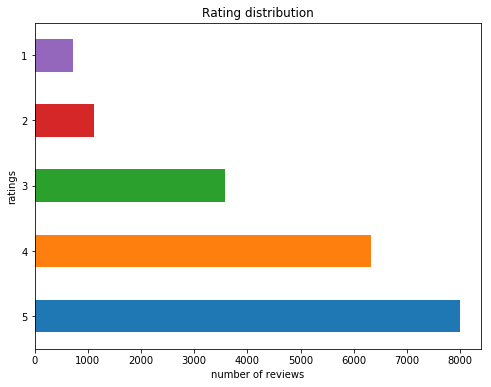

In [7]:
ax=df.Score.value_counts().\
   plot.barh(figsize=(8,6), title="Rating distribution");
ax.set(ylabel="ratings", xlabel="number of reviews");

- __Analysis:__ From the bar chart, we can see most restaurants are rated with full score, which indicates the overall popularity of the restaurants are relatively high.

## Analysis of rating ditribution of top restaurants

([<matplotlib.patches.Wedge at 0x1a21c3e358>,
 [Text(-0.0742339,1.09749,'Score=3.0'),
  Text(-0.919342,0.603995,'Score=4.0'),
  Text(0.852755,-0.694844,'Score=5.0')],
 [Text(-0.0404912,0.598632,'3.3%'),
  Text(-0.501459,0.329452,'26.1%'),
  Text(0.465139,-0.379006,'70.7%')])

(-1.1099393322333313, 1.116844161024989, -1.117266617696898, 1.101432800204747)

Text(0.5,1,'Ratings of Peter Luger')

([<matplotlib.patches.Wedge at 0x1a21ca2630>,
 [Text(-0.191013,1.08329,'Score=3.0'),
  Text(-1.03366,0.376222,'Score=4.0'),
  Text(0.932853,-0.582911,'Score=5.0')],
 [Text(-0.104189,0.590885,'6.7%'),
  Text(-0.563816,0.205212,'26.7%'),
  Text(0.508829,-0.317951,'66.7%')])

(-1.1079821537837495,
 1.1061592783917158,
 -1.1058837920304752,
 1.1021967954796739)

Text(0.5,1,'Ratings of The Halal Guys')

([<matplotlib.patches.Wedge at 0x1a21ce4978>,
 [Text(-0.0392518,1.0993,'Score=2.0'),
  Text(-0.231656,1.07533,'Score=3.0'),
  Text(-1.01078,0.43397,'Score=4.0'),
  Text(0.918879,-0.6047,'Score=5.0')],
 [Text(-0.0214101,0.599618,'2.2%'),
  Text(-0.126358,0.586544,'3.4%'),
  Text(-0.551333,0.236711,'27.0%'),
  Text(0.501206,-0.329836,'67.4%')])

(-1.1029109137248638,
 1.1084615288880992,
 -1.1104991817174574,
 1.100722250836828)

Text(0.5,1,"Ratings of Carmine's Italian Restaurant - Times Square")

([<matplotlib.patches.Wedge at 0x1a21daf780>,
 [Text(-0.541666,0.957391,'Score=3.0'),
  Text(-0.878499,-0.661997,'Score=4.0'),
  Text(1.09494,0.10543,'Score=5.0')],
 [Text(-0.295454,0.522213,'17.5%'),
  Text(-0.479181,-0.361089,'36.7%'),
  Text(0.597238,0.0575075,'45.8%')])

(-1.1125327401653258,
 1.1201274667581789,
 -1.1190377912751903,
 1.1070105041448632)

Text(0.5,1,'Ratings of Ippudo Westside')

([<matplotlib.patches.Wedge at 0x1a21e6bac8>,
 [Text(-0.236467,1.07428,'Score=3.0'),
  Text(-1.08551,-0.17796,'Score=4.0'),
  Text(1.09839,-0.0595528,'Score=5.0')],
 [Text(-0.128982,0.585972,'6.9%'),
  Text(-0.592096,-0.0970692,'41.4%'),
  Text(0.59912,-0.0324833,'51.7%')])

(-1.1235876574611172,
 1.1072933444904813,
 -1.1092703220534166,
 1.1004414439073056)

Text(0.5,1,'Ratings of Buddaken')

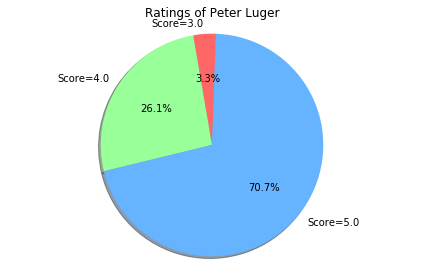

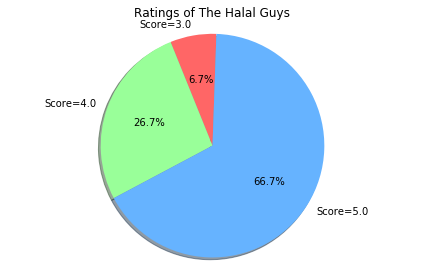

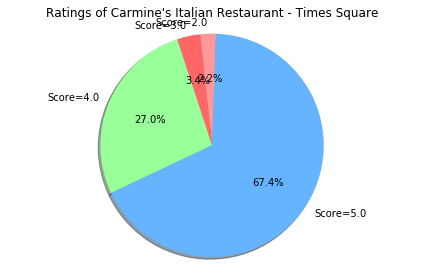

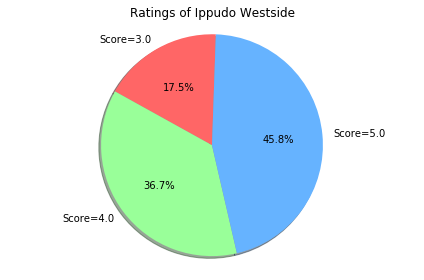

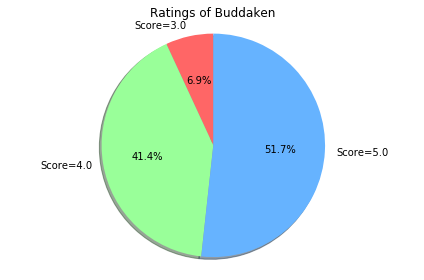

In [8]:
# get pie charts of top restaurants

# Peter Luger
df1= df[(df.Restaurant_Name == "Peter Luger")]
df1= df1[['Restaurant_Name','Score']]
df1=df1.groupby('Score').count()
# Pie chart
labels= ['Score=3.0', 'Score=4.0','Score=5.0']
sizes= [df1.iat[0,0]*3.0, df1.iat[1,0]*4.0, df1.iat[2,0]*5.0]
# add colors
colors= ['#ff6666','#99ff99','#66b3ff']
fig1,ax1= plt.subplots()
# explode 1st slice
explode= (0, 0, 0)
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=88)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.title('Ratings of Peter Luger')
plt.tight_layout()



# The Halal Guys
df3= df[(df.Restaurant_Name == "The Halal Guys")]
df3= df3[['Restaurant_Name','Score']]
df3=df3.groupby('Score').count()
# Pie chart
labels= ['Score=3.0', 'Score=4.0','Score=5.0']
sizes= [df3.iat[0,0]*3.0, df3.iat[1,0]*4.0, df3.iat[2,0]*5.0]
# explode 1st slice
explode= (0, 0, 0) 
#add colors
colors= ['#ff6666','#99ff99','#66b3ff']
fig1, ax1= plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=88)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.title('Ratings of The Halal Guys')
plt.tight_layout()

# Carmine's Italian Restaurant - Times Square 
df4= df[(df.Restaurant_Name == "Carmine's Italian Restaurant - Times Square")]
df4= df4[['Restaurant_Name','Score']]
df4=df4.groupby('Score').count()
# Pie chart
labels= ['Score=2.0', 'Score=3.0', 'Score=4.0', 'Score=5.0']
sizes= [df4.iat[0,0]*2.0, df4.iat[1,0]*3.0, df4.iat[2,0]*4.0,df4.iat[3,0]*5.0]
# explode 1st slice
explode= (0, 0, 0, 0) 
#add colors
colors= ['#ff9999','#ff6666','#99ff99','#66b3ff']
fig1, ax1= plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=88)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.title('Ratings of Carmine\'s Italian Restaurant - Times Square')
plt.tight_layout()

#-Ippudo Westside 
# find all scores of The Metropolitan Museum of Art 
df5= df[(df.Restaurant_Name == "Ippudo Westside")]
df5= df5[['Restaurant_Name','Score']]
df5=df5.groupby('Score').count()
# Pie chart
labels= ['Score=3.0', 'Score=4.0', 'Score=5.0']
sizes= [df5.iat[1,0]*3.0, df5.iat[2,0]*4.0, df5.iat[2,0]*5.0]
# explode 1st slice
explode= (0, 0, 0) 
#add colors
colors= ['#ff6666','#99ff99','#66b3ff']
fig1, ax1= plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=88)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.title('Ratings of Ippudo Westside')
plt.tight_layout()



# -Buddakan
df2= df[(df.Restaurant_Name == "Buddakan")]
df2= df2[['Restaurant_Name','Score']]
df2= df2.groupby('Score').count()
# Pie chart
labels= ['Score=3.0', 'Score=4.0', 'Score=5.0']
sizes= [df2.iat[0,0]*3.0, df2.iat[1,0]*4.0, df2.iat[2,0]*5.0]
# explode 1st slice
explode= (0, 0, 0) 
# add colors
colors= ['#ff6666','#99ff99','#66b3ff']
fig1,ax1= plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.title('Ratings of Buddaken')
plt.tight_layout()

## Generate Wordcloud

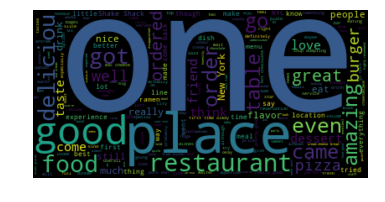

In [13]:
reviews = []
reviews = df.review
#print(reviews[0])
reviews = " ".join([i[ : ] for i in reviews])

#Generate a word cloud image
wordcloud = WordCloud().generate(reviews)

#Display the generated image:
wordcloud = WordCloud(max_font_size=200).generate(reviews);
plt.figure();
plt.imshow(wordcloud, interpolation="bilinear");
plt.axis("off");
plt.show();

- Note: The wordcloud above is just a initial visualization to give us some idea on the review. Deeper analysis will be achieved in the following parts.